In [0]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

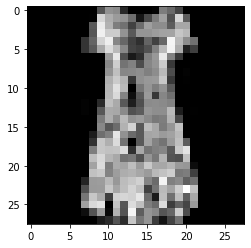

In [0]:
plt.imshow(xtrain[22000],cmap='gray')
plt.show()

In [0]:
class_names[ytrain[22000]]

'Dress'

In [0]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


Convolutional Neural Network

In [0]:
from tensorflow.keras import models,layers

In [0]:
# initialize CNN
model = models.Sequential()
# add first convolutional layer
model.add(layers.Conv2D(filters=10,kernel_size=(3,3),input_shape=(28,28,1),
                        activation='relu'))
model.add(layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu'))
#adding a pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#add a flatten layer to shift to classificatio section
model.add(layers.Flatten())
# add a hidden layer with 100 neurons
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(120,activation='relu'))
#add output layer
model.add(layers.Dense(10,activation='softmax'))

In [0]:
#compile
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])
#train
model.fit(xtrain,ytrain,epochs=10,batch_size=1000,verbose=True,
          validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 25us/sample - loss: 4.5694 - acc: 0.6570 - val_loss: 0.5796 - val_acc: 0.7943
Epoch 2/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4570 - acc: 0.8403 - val_loss: 0.4306 - val_acc: 0.8483
Epoch 3/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3417 - acc: 0.8804 - val_loss: 0.3752 - val_acc: 0.8668
Epoch 4/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2773 - acc: 0.9014 - val_loss: 0.3506 - val_acc: 0.8762
Epoch 5/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2346 - acc: 0.9152 - val_loss: 0.3359 - val_acc: 0.8806
Epoch 6/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2002 - acc: 0.9273 - val_loss: 0.3273 - val_acc: 0.8877
Epoch 7/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1685 - acc: 0.9401 - val_loss: 0.

In [0]:
model.save("model.h5")